In [1]:
id = {'KLONGTEI': 'cluster_1892287670_272491964_272492178',
      'RAMA4': 'cluster_272488163_282390730_66263210_66263222',
      'NARANONG': 'cluster_272488164_272492179_3457051443_61907354',
      'SUNLAKAKHON': 'gneJ83',
      'KASEMRAT': 'cluster_272448137_272555800_272555808_7660045934_7710268409',
      'ATTHAKAWI_RAMA4' : '270329335'}
number_phase = [3,7,6,4,3,3]

In [2]:
# import gym
# from gym import error, spaces
import csv
import os, sys
sys.path.append(os.path.join('/home/ring/sumo-svn/', 'tools'))
import traci
import traci.constants as tc
import numpy as np
from sumolib import checkBinary
import datetime
import matplotlib
import matplotlib.pyplot as plt
import torch
import copy
import random
import pandas as pd
from multiprocessing.pool import ThreadPool
from itertools import zip_longest

In [3]:
namelane_csv = pd.read_csv('namelane_KASEMRAT.csv')
namelane_df = pd.DataFrame(namelane_csv, columns = ['name' , 'id'])
NAME = namelane_df.set_index('name')
ID = namelane_df.set_index('id')
if NAME.loc['KASEMRAT_EB_0_0_XSXX','id'] == '459551209#3_0':
    print('ok')

ok


In [4]:
ID.loc['820373198#0_3', 'name']

'RAMA4_WB_2_3_XSXX'

In [5]:
namedetector_csv = pd.read_csv('namedetector_KASEMRAT_flow.csv')
namedetector_df = pd.DataFrame(namedetector_csv, columns = ['name' , 'id'])
NAME_D = namedetector_df.set_index('name')
ID_D = namedetector_df.set_index('id')
listdetector = open("namedetector_KASEMRAT_flow.txt", "r")
detector = {}
for l in listdetector:
    l = l.strip().split(' ')
    if len(l)> 1:
        d = []
        for detec in l[2:]:
            if type(NAME_D.loc[detec,'id']) == str:
                d.append(NAME_D.loc[detec,'id'])
            else : d.append(NAME_D.loc[detec,'id'][0])
    if str(l[0])!= '':
        detector[str(l[0])] = d

In [6]:
NAME_D.head()

,id
name,
RAMA4_EB_1_4_XSXX,D459492917#0_4
KLONGTEI_EB_0_0_XSXX,D825786400_0
KLONGTEI_EB_0_1_XSXX,D825786400_1
KLONGTEI_EB_0_2_XSXX,D825786400_2
KLONGTEI_EB_0_3_XSXX,D825786400_3


In [7]:
detector

{'RAMA4_EB_FP1_TP3': ['D459492917#0_4', 'D825786400_4'],
 'RAMA4_EB_FP3_TP2': ['D825786400_0',
  'D825786400_1',
  'D825786400_2',
  'D825786400_3',
  'D825786400_4',
  'D459492912#1_0',
  'D459492912#1_1',
  'D459492912#1_2',
  'D459492912#1_3',
  'D459492912#0_0',
  'D459492912#0_1',
  'D459492912#0_2',
  'D459492912#0_3',
  'D752225467_0',
  'D752225467_1',
  'D825786397_0',
  'D825786397_1',
  'D825786397_2',
  'D825786397_3',
  'D825786397_4',
  'D825786383#0_0',
  'D825786383#0_1',
  'D825786383#0_2',
  'D825786383#0_3',
  'D825786410_0',
  'D825786410_1',
  'D825786410_2',
  'D825786410_3',
  'D459492917#0_0',
  'D459492917#0_1',
  'D459492917#0_2',
  'D459492917#0_3',
  'D459492917#0_4'],
 'RAMA4_WB_FP3_TP2': ['D825786415_5'],
 'RAMA4_WB_FP2_TP4': ['D825786415_5'],
 'RAMA4_SB_FP4_TP5': ['D25053655#0_0', 'D25053655#0_1', 'D25053655#0_2'],
 'RAMA4_NB_FP5_TP1': ['D824116545_0',
  'D824116545_1',
  'D824116545_2',
  'D824116548_1',
  'D824116548_2',
  'D824116548_3',
  'D824116547_

In [8]:
# type(NAME_D.loc['KLONGTEI_EB_0_0_XSXX','id'])
len(list(detector.keys()))

32

In [9]:
# ID.loc['']#, '820373198#0', '820373196#0', '482209831#0']

In [10]:
# # RAMA4
# RAMA4_EB_R = [NAME.loc['RAMA4_EB_1_4_XSXX','id'], NAME.loc['RAMA4_EB_0_3_XSRT','id']]
# RAMA4_EB = [NAME.loc['KLONGTEI_EB_5_0_XSXX','id'],NAME.loc['KLONGTEI_EB_5_1_XSXX','id'],NAME.loc['KLONGTEI_EB_5_2_XSXX','id'],NAME.loc['KLONGTEI_EB_5_3_XSXX','id']]
# RAMA4_SB = [NAME.loc['RAMA4_SB_3_1_XSXX','id'],NAME.loc['RAMA4_SB_3_2_XSXX','id']]
# RAMA4_NB = [NAME.loc['RAMA4_NB_0_0_XSXX','id'],NAME.loc['RAMA4_NB_0_1_XSXX','id'],NAME.loc['RAMA4_NB_0_2_XSRT','id'],NAME.loc['RAMA4_NB_1_0_LSXX','id'],NAME.loc['RAMA4_NB_1_1_XSXX','id'],NAME.loc['RAMA4_NB_1_2_XSXX','id'],NAME.loc['RAMA4_NB_1_3_XSXX','id'],NAME.loc['RAMA4_NB_2_0_XSXX','id'],NAME.loc['RAMA4_NB_2_1_XSXX','id'],NAME.loc['RAMA4_NB_2_2_XSXX','id'],NAME.loc['RAMA4_NB_3_0_XSXX','id'],NAME.loc['RAMA4_NB_3_1_XSXX','id']]
# RAMA4_WB = [NAME.loc['RAMA4_WB_0_0_XSXX','id'],NAME.loc['RAMA4_WB_0_1_XSXX','id'],NAME.loc['RAMA4_WB_0_2_XSXX','id'],NAME.loc['RAMA4_WB_0_3_XSXX','id'],NAME.loc['RAMA4_WB_0_4_XSRT','id'],NAME.loc['RAMA4_WB_1_0_LSXX','id'],NAME.loc['RAMA4_WB_1_1_XSXX','id'],NAME.loc['RAMA4_WB_1_2_XSXX','id'],NAME.loc['RAMA4_WB_1_3_XSXX','id'],NAME.loc['RAMA4_WB_1_4_XSXX','id'],NAME.loc['RAMA4_WB_1_5_XSXX','id'],NAME.loc['RAMA4_WB_2_0_XSXX','id'],NAME.loc['RAMA4_WB_2_1_XSXX','id'],NAME.loc['RAMA4_WB_2_2_XSXX','id'],NAME.loc['RAMA4_WB_2_3_XSXX','id'],NAME.loc['RAMA4_WB_3_0_XSXX','id'],NAME.loc['RAMA4_WB_3_1_XSXX','id'],NAME.loc['RAMA4_WB_3_2_XSXX','id'],NAME.loc['RAMA4_WB_4_0_XSXX','id'],NAME.loc['RAMA4_WB_4_1_XSXX','id'],NAME.loc['RAMA4_WB_5_0_LSXX','id'],NAME.loc['RAMA4_WB_5_1_XSXX','id'],NAME.loc['RAMA4_WB_5_2_XSXX','id'],NAME.loc['RAMA4_WB_6_0_LSXX','id'],NAME.loc['RAMA4_WB_6_1_XSXX','id'],NAME.loc['RAMA4_WB_6_2_XSXX','id']]
# RAMA4_WB_R = [NAME.loc['RAMA4_WB_0_4_XSRT','id'], NAME.loc['RAMA4_WB_1_5_XSXX','id'],NAME.loc['RAMA4_WB_2_3_XSXX','id']]

In [11]:
# KLONGTEI_NB = [NAME.loc['KLONGTEI_NB_0_0_LSXX','id'],NAME.loc['KLONGTEI_NB_0_1_XSXX','id'],NAME.loc['KLONGTEI_NB_0_2_XSXX','id'],NAME.loc['KLONGTEI_NB_0_3_XSRT','id'],NAME.loc['KLONGTEI_NB_1_0_LSXX','id'],NAME.loc['KLONGTEI_NB_1_1_XSXX','id'],NAME.loc['KLONGTEI_NB_1_2_XSXX','id'],NAME.loc['KLONGTEI_NB_1_3_XSXX','id'],NAME.loc['KLONGTEI_NB_2_0_LSXX','id'],NAME.loc['KLONGTEI_NB_2_1_XSXX','id'],NAME.loc['KLONGTEI_NB_2_2_XSXX','id'],NAME.loc['KLONGTEI_NB_2_3_XSXX','id']]

In [12]:
# # NARANONG
# NARANONG_EB = [NAME.loc['NARANONG_EB_0_0_LSXX','id'],NAME.loc['NARANONG_EB_0_1_XSRT','id'],NAME.loc['NARANONG_EB_1_0_XSXX','id'],NAME.loc['NARANONG_EB_1_1_XSXX','id'],NAME.loc['NARANONG_EB_2_0_XSXX','id'],NAME.loc['NARANONG_EB_2_1_XSXX','id'],NAME.loc['NARANONG_EB_2_2_XSXX','id'],NAME.loc['NARANONG_EB_3_0_XSXX','id'],NAME.loc['NARANONG_EB_3_1_XSRX','id'],NAME.loc['NARANONG_EB_4_0_LSXX','id'],NAME.loc['NARANONG_EB_4_1_XSXX','id'],NAME.loc['NARANONG_EB_5_0_LSXX','id'],NAME.loc['NARANONG_EB_5_1_XSRX','id']]
# NARANONG_WB = [NAME.loc['NARANONG_WB_0_0_LSXX','id'],NAME.loc['NARANONG_WB_0_1_XSXX','id'],NAME.loc['NARANONG_WB_0_2_XSXX','id'],NAME.loc['NARANONG_WB_0_3_XSRT','id'],NAME.loc['NARANONG_WB_1_0_XSXX','id'],NAME.loc['NARANONG_WB_1_1_XSXX','id'],NAME.loc['NARANONG_WB_1_2_XSXX','id'],NAME.loc['NARANONG_WB_2_0_LSXX','id'],NAME.loc['NARANONG_WB_2_1_XSXX','id'],NAME.loc['NARANONG_WB_2_2_XSXX','id'],NAME.loc['NARANONG_WB_3_0_XSXX','id'],NAME.loc['NARANONG_WB_3_1_XSXX','id'],NAME.loc['NARANONG_WB_3_2_XSXX','id'],NAME.loc['NARANONG_WB_3_3_XSXX','id'],NAME.loc['NARANONG_WB_4_0_XSXX','id'],NAME.loc['NARANONG_WB_4_1_XSXX','id'],NAME.loc['NARANONG_WB_4_2_XSXX','id']]
# NARANONG_SB = [NAME.loc['NARANONG_SB_0_0_LSXX','id'],NAME.loc['NARANONG_SB_0_1_XSXX','id'],NAME.loc['NARANONG_SB_0_2_XSRX','id'],NAME.loc['NARANONG_SB_1_0_LSXX','id'],NAME.loc['NARANONG_SB_1_1_XSXX','id'],NAME.loc['NARANONG_SB_1_2_XSXX','id'],NAME.loc['NARANONG_SB_1_3_XSXX','id'],NAME.loc['NARANONG_SB_2_0_XSXX','id'],NAME.loc['NARANONG_SB_2_1_XSXX','id'],NAME.loc['NARANONG_SB_2_2_XSXX','id'],NAME.loc['NARANONG_SB_2_3_XSXX','id']]
# NARANONG_SW = [NAME.loc['NARANONG_SW_0_1_XSRX','id'],NAME.loc['NARANONG_SW_1_0_XSXX','id'],NAME.loc['NARANONG_SW_1_1_XSXX','id'],NAME.loc['NARANONG_SW_1_2_XSXX','id'],NAME.loc['NARANONG_SW_1_3_XSXX','id'],NAME.loc['NARANONG_SW_2_0_XSXX','id'],NAME.loc['NARANONG_SW_2_1_XSXX','id'],NAME.loc['NARANONG_SW_2_2_XSXX','id']]
# NARANONG_NB = [NAME.loc['NARANONG_NB_0_0_XSXX','id'],NAME.loc['NARANONG_NB_0_1_XSRX','id'],NAME.loc['NARANONG_NB_1_0_LSXX','id'],NAME.loc['NARANONG_NB_1_1_XSXX','id'],NAME.loc['NARANONG_NB_1_2_XSXX','id'],NAME.loc['NARANONG_NB_2_0_XSXX','id'],NAME.loc['NARANONG_NB_2_1_XSXX','id']]
# NARANONG_EB_R = [NAME.loc['NARANONG_EB_0_1_XSRT','id']]

In [13]:
# # SUNLAKAKHON
# SUNLAKAKHON_EB = [NAME.loc['SUNLAKAKHON_EB_0_0_LSXX','id'],NAME.loc['SUNLAKAKHON_EB_0_1_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_0_2_XSRT','id'],NAME.loc['SUNLAKAKHON_EB_1_0_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_1_1_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_1_2_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_1_3_XSRX','id'],NAME.loc['SUNLAKAKHON_EB_2_0_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_2_1_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_2_2_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_3_0_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_3_1_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_4_0_XSXX','id']]
# SUNLAKAKHON_WB = [NAME.loc['SUNLAKAKHON_WB_0_0_LSXX','id'],NAME.loc['SUNLAKAKHON_WB_0_1_XSXX','id'],NAME.loc['SUNLAKAKHON_WB_0_2_XSRX','id'],NAME.loc['SUNLAKAKHON_WB_1_0_XSXX','id'],NAME.loc['SUNLAKAKHON_WB_1_1_XSXX','id'],NAME.loc['SUNLAKAKHON_WB_1_2_XSXX','id'],NAME.loc['SUNLAKAKHON_WB_2_0_XSXX','id'],NAME.loc['SUNLAKAKHON_WB_2_1_XSXX','id']]
# SUNLAKAKHON_SB = [NAME.loc['SUNLAKAKHON_SB_0_0_LSXX','id'],NAME.loc['SUNLAKAKHON_SB_0_1_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_0_2_XSRT','id'],NAME.loc['SUNLAKAKHON_SB_1_0_LSXX','id'],NAME.loc['SUNLAKAKHON_SB_1_1_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_1_2_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_1_3_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_2_0_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_2_1_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_2_2_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_3_0_LSXX','id'],NAME.loc['SUNLAKAKHON_SB_3_1_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_3_2_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_3_3_XSRX','id'],NAME.loc['SUNLAKAKHON_SB_4_0_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_4_1_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_4_2_XSXX','id']]
# SUNLAKAKHON_NB = [NAME.loc['SUNLAKAKHON_NB_0_0_LSXX','id'],NAME.loc['SUNLAKAKHON_NB_0_1_XSXX','id'],NAME.loc['SUNLAKAKHON_NB_0_2_XSRX','id'],NAME.loc['SUNLAKAKHON_NB_1_0_LSXX','id'],NAME.loc['SUNLAKAKHON_NB_1_1_XSXX','id'],NAME.loc['SUNLAKAKHON_NB_1_2_XSXX','id'],NAME.loc['SUNLAKAKHON_NB_2_0_XSXX','id'],NAME.loc['SUNLAKAKHON_NB_2_1_XSXX','id'],NAME.loc['SUNLAKAKHON_NB_2_2_XSXX','id'],NAME.loc['SUNLAKAKHON_NB_3_0_LSXX','id'],NAME.loc['SUNLAKAKHON_NB_3_1_XSXX','id'],NAME.loc['SUNLAKAKHON_NB_3_2_XSXX','id']]

In [14]:
# # KASEMRAT
# KASEMRAT_EB = [NAME.loc['KASEMRAT_EB_0_0_XSXX','id'],NAME.loc['KASEMRAT_EB_0_1_XSXX','id'],NAME.loc['KASEMRAT_EB_0_2_XSXX','id'],NAME.loc['KASEMRAT_EB_0_3_XSRT','id'],NAME.loc['KASEMRAT_EB_1_0_LSXX','id'],NAME.loc['KASEMRAT_EB_1_1_XSXX','id'],NAME.loc['KASEMRAT_EB_1_2_XSXX','id'],NAME.loc['KASEMRAT_EB_1_3_XSXX','id'],NAME.loc['KASEMRAT_EB_2_0_LSXX','id'],NAME.loc['KASEMRAT_EB_2_1_XSXX','id'],NAME.loc['KASEMRAT_EB_2_2_XSXX','id'],NAME.loc['KASEMRAT_EB_3_0_LSXX','id'],NAME.loc['KASEMRAT_EB_3_1_XSXX','id'],NAME.loc['KASEMRAT_EB_3_2_XSXX','id'],NAME.loc['KASEMRAT_EB_4_0_LSXX','id'],NAME.loc['KASEMRAT_EB_4_1_XSXX','id'],NAME.loc['KASEMRAT_EB_4_2_XSXX','id'],NAME.loc['KASEMRAT_EB_5_0_LSXX','id'],NAME.loc['KASEMRAT_EB_5_1_XSXX','id'],NAME.loc['KASEMRAT_EB_5_2_XSXX','id'],NAME.loc['KASEMRAT_EB_5_3_XSXX','id'],NAME.loc['KASEMRAT_EB_6_0_LSXX','id'],NAME.loc['KASEMRAT_EB_6_1_XSXX','id'],NAME.loc['KASEMRAT_EB_6_2_XSXX','id'],NAME.loc['KASEMRAT_EB_6_3_XSXX','id'],NAME.loc['KASEMRAT_EB_7_0_LSXX','id'],NAME.loc['KASEMRAT_EB_7_1_XSXX','id'],NAME.loc['KASEMRAT_EB_7_2_XSXX','id'],NAME.loc['KASEMRAT_EB_7_3_XSXX','id'],NAME.loc['KASEMRAT_EB_8_0_XSXX','id'],NAME.loc['KASEMRAT_EB_8_1_XSXX','id'],NAME.loc['KASEMRAT_EB_8_2_XSXX','id'],NAME.loc['KASEMRAT_EB_8_3_XSXX','id'],NAME.loc['KASEMRAT_EB_8_4_XSXX','id'],NAME.loc['KASEMRAT_EB_9_0_XSXX','id'],NAME.loc['KASEMRAT_EB_9_1_XSXX','id'],NAME.loc['KASEMRAT_EB_9_2_XSXX','id'],NAME.loc['KASEMRAT_EB_9_3_XSXX','id']]
# KASEMRAT_WB = [NAME.loc['KASEMRAT_WB_0_0_LSXX','id'],NAME.loc['KASEMRAT_WB_0_1_XSXX','id'],NAME.loc['KASEMRAT_WB_0_2_XSXX','id'],NAME.loc['KASEMRAT_WB_1_0_XSXX','id'],NAME.loc['KASEMRAT_WB_1_1_XSXX','id'],NAME.loc['KASEMRAT_WB_1_2_XSXX','id'],NAME.loc['KASEMRAT_WB_1_3_XSRX','id'],NAME.loc['KASEMRAT_WB_2_0_XSXX','id'],NAME.loc['KASEMRAT_WB_2_1_XSXX','id'],NAME.loc['KASEMRAT_WB_2_2_XSXX','id'],NAME.loc['KASEMRAT_WB_3_0_LSXX','id'],NAME.loc['KASEMRAT_WB_3_1_XSXX','id'],NAME.loc['KASEMRAT_WB_3_2_XSXX','id']]
# KASEMRAT_NB = [NAME.loc['KASEMRAT_NB_0_0_LSXX','id'],NAME.loc['KASEMRAT_NB_0_1_XSXX','id'],NAME.loc['KASEMRAT_NB_0_2_XSRX','id'],NAME.loc['KASEMRAT_NB_1_0_LSXX','id'],NAME.loc['KASEMRAT_NB_1_1_XSXX','id'],NAME.loc['KASEMRAT_NB_1_2_XSXX','id'],NAME.loc['KASEMRAT_NB_2_0_XSXX','id'],NAME.loc['KASEMRAT_NB_2_1_XSXX','id'],NAME.loc['KASEMRAT_NB_3_0_LSXX','id'],NAME.loc['KASEMRAT_NB_3_1_XSXX','id'],NAME.loc['KASEMRAT_NB_3_2_XSXX','id'],NAME.loc['KASEMRAT_NB_3_3_XSRT','id'],NAME.loc['KASEMRAT_NB_4_0_XSXX','id'],NAME.loc['KASEMRAT_NB_4_1_XSXX','id'],NAME.loc['KASEMRAT_NB_4_2_XSXX','id'],NAME.loc['KASEMRAT_NB_5_0_XSXX','id'],NAME.loc['KASEMRAT_NB_5_1_XSXX','id'],NAME.loc['KASEMRAT_NB_5_2_XSXX','id'],NAME.loc['KASEMRAT_NB_5_3_XSXX','id'],NAME.loc['KASEMRAT_NB_6_0_XSXX','id'],NAME.loc['KASEMRAT_NB_6_1_XSXX','id'],NAME.loc['KASEMRAT_NB_6_2_XSXX','id']]
# KASEMRAT_EB_R = [NAME.loc['KASEMRAT_EB_0_3_XSRT','id'],NAME.loc['KASEMRAT_EB_1_3_XSXX','id']]

In [15]:
# MASUKGRIDLOCK = [NAME.loc['MASUKGRIDLOCK_ARI_NB_0_0_LSXX','id'],NAME.loc['MASUKGRIDLOCK_MASUK_WB_0_0_LSRX','id'],NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_0_0_XSRT','id'],NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_1_0_LSXT','id'],NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_2_0_LXXX','id']]
# SUKHUMVIT = [NAME.loc['MASUKGRIDLOCK_SUKHUMVUT22_SB_0_0_XSXX','id'],NAME.loc['MASUKGRIDLOCK_SUKHUMVUT24_SB_0_0_XSXX','id']]

In [16]:
#decision threshold

In [17]:
#MAX GREEN TIME

In [18]:
#reset the environment
def start():
    sumoBinary = checkBinary('sumo-gui')
    traci.start([sumoBinary, "-c", "KASEMRAT-SUMO-UsingBookNetFile/osm.sumocfg",
                             "--tripinfo-output", "tripinfo.xml", '--start','true','--quit-on-end','true','--time-to-teleport','-1',
                '--lanechange.duration', '0.1'])

In [19]:
def get_occupancy_average_percent(detector_id): 
    #get occupancy average for all detector in list of detector_id and scale by (Vehicle Length + MinimumGap)/MinimumGap 
    #Vehicle Length = 4.62 MinimumGap = 2.37
    occupancy = (sum([traci.lanearea.getLastStepOccupancy(e) for e in detector_id])/len(detector_id))*((4.62+2.37)/4.62)
    return occupancy

In [20]:
def get_flow_sum(detector_id):
#     Speed (metres per sec) = flow (vehicle per sec) / density (veh per metre), Ajarn chaodit
#         flow= int(densityPerLane) * float(meanSpeed)#flow per lane
#     print('LastStepVehicleNumber', sum([traci.lanearea.getLastStepVehicleNumber(e) for e in detector_id]))
#     print('length', sum([traci.lanearea.getLength(i) for i in detector_id]))
#     density = sum([traci.lanearea.getLastStepVehicleNumber(e) for e in detector_id])/\
#     sum([traci.lanearea.getLength(i) for i in detector_id])
#     print('density', density)
    
    flow = sum(([traci.lanearea.getLastStepVehicleNumber(e)*traci.lanearea.getLastStepMeanSpeed(e)/traci.lanearea.getLength(e) for e in detector_id if
              traci.lanearea.getLastStepMeanSpeed(e) >= 0]))
#     list_flow = [traci.lanearea.getLastStepVehicleNumber(e)*traci.lanearea.getLastStepMeanSpeed(e)/traci.lanearea.getLength(e) for e in \
#                  detector['NARANONG_SB_FP5_TP6'] if traci.lanearea.getLastStepMeanSpeed(e) >= 0]
#     print(list_flow)
#     flowRama = sum(([traci.lanearea.getLastStepVehicleNumber(e)*traci.lanearea.getLastStepMeanSpeed(e)/traci.lanearea.getLength(e) for e in\
#                      detector['SUNLAKAKHON_SB_FP4_TP1'] if traci.lanearea.getLastStepMeanSpeed(e) >= 0]))
#     print(flowRama)
#     print('flow', flow)
    #     #https://sumo.dlr.de/docs/TraCI/Lane_Area_Detector_Value_Retrieval.html
#     flow = sum([traci.inductionloop.getTimeSinceDetection(e) for e in detector_id])#-sum([traci.lanearea.getJamLengthVehicle(e) for e in detector_id])
#     traci.inductionloop.getTimeSinceDetection()
# #     flow = sum([traci.lanearea.getLastStepVehicleNumber(e) for e in detector_id])#-sum([traci.lanearea.getJamLengthVehicle(e) for e in detector_id])
    
    return flow

In [21]:
def get_mean_speed(detector_id):
    speed = [traci.lanearea.getLastStepMeanSpeed(e) for e in detector_id if traci.lanearea.getLastStepMeanSpeed(e)>=0]
#     print(speed)
    mean_speed = sum(speed)/max(len(speed),1)
#     print('speed',mean_speed)
    return mean_speed

In [22]:
def get_numberoflane(e,detector_id):
    numberoflane = 0
    for d in detector_id:
        if e[:-2] == d[:-2]:
            numberoflane += 1
    return numberoflane 

In [23]:
def get_unjamlength_meters(detector_id): 
    detector_length = sum(traci.lanearea.getLength(e) for e in detector_id)
    unjamlength = detector_length - (sum([traci.lanearea.getJamLengthMeters(e) for e in detector_id])) #/detector_length
    return unjamlength

In [24]:
def RAMA4_find_action(selected_traffic_signal_phases,list_greentime_duration, threshold, duration):
    current_phase = selected_traffic_signal_phases[2]
    next_phase_ifno_interupt = selected_traffic_signal_phases[3]
    greentime_duration = list_greentime_duration[1]
    
    if current_phase == 1: #*** --->1
#         print(get_flow_sum(detector['RAMA4_EB_FP1_TP3']))
        if duration['RAMA4_FP1_END_MINGREEN'] >= greentime_duration:
            count['RAMA4_FP1_END_MINGREEN'] += 1
            current_phase = 1
        elif duration['RAMA4_FP1_END_MAXGREEN'] <= greentime_duration or threshold['RAMA4_FP1_END_FLOW'] >=\
        get_flow_sum(detector['RAMA4_EB_FP1_TP3']):
            
            if duration['RAMA4_FP1_END_MAXGREEN'] <= greentime_duration:
                count['RAMA4_FP1_END_MAXGREEN'] += 1
            if threshold['RAMA4_FP1_END_FLOW'] >= get_flow_sum(detector['RAMA4_EB_FP1_TP3']):
                count['RAMA4_FP1_END_FLOW'] += 1
            if  next_phase_ifno_interupt == None:
                current_phase = 3
            else:
                current_phase = next_phase_ifno_interupt 
                next_phase_ifno_interupt = None
        elif threshold['RAMA4_FPX_TP5_UNJAM'] >= get_unjamlength_meters(detector['RAMA4_NB_FPX_TP5']):
            count['RAMA4_FPX_TP5_UNJAM'] += 1
            next_phase_ifno_interupt = 3
            current_phase = 5
    elif current_phase == 3: #---><---3
        if duration['RAMA4_FP3_END_MINGREEN'] >= greentime_duration:
            count['RAMA4_FP3_END_MINGREEN'] += 1
            current_phase = 3
        elif threshold['RAMA4_FP3_END_UNJAM'] >= get_unjamlength_meters(detector['RAMA4_WB_FP3_TP2']) and threshold['RAMA4_FP3_END_OCC'] >=\
        get_occupancy_average_percent(detector['RAMA4_EB_FP3_TP2']):
            count['RAMA4_FP3_END_UNJAM'] += 1
            count['RAMA4_FP3_END_OCC'] += 1
            current_phase = 2
        elif threshold['RAMA4_FPX_TP5_UNJAM'] >= get_unjamlength_meters(detector['RAMA4_NB_FPX_TP5']):
            count['RAMA4_FPX_TP5_UNJAM'] += 1
            next_phase_ifno_interupt = 2
            current_phase = 5
        elif threshold['RAMA4_FPX_TP1_UNJAM'] >= get_unjamlength_meters(detector['RAMA4_EB_FPX_TP1']):
            count['RAMA4_FPX_TP1_UNJAM'] += 1
            next_phase_ifno_interupt = 2
            current_phase = 1
        elif duration['RAMA4_FP3_END_MAXGREEN']<= greentime_duration: 
            count['RAMA4_FP3_END_MAXGREEN'] += 1
            current_phase = 2
    elif current_phase == 2: #<---2
        
        if duration['RAMA4_FP2_END_MINGREEN'] >= greentime_duration:
            count['RAMA4_FP2_END_MINGREEN'] += 1
            current_phase = 2
        elif duration['RAMA4_FP2_END_MAXGREEN'] <= greentime_duration or threshold['RAMA4_FP2_END_FLOW'] >=\
                                                                      get_flow_sum(detector['RAMA4_WB_FP2_TP4']):
            current_phase = 4
            if duration['RAMA4_FP2_END_MAXGREEN'] <= greentime_duration :
                count['RAMA4_FP2_END_MAXGREEN'] += 1
            if threshold['RAMA4_FP2_END_FLOW'] >= get_flow_sum(detector['RAMA4_WB_FP2_TP4']):
                count['RAMA4_FP2_END_FLOW'] += 1
        elif threshold['RAMA4_FPX_TP5_UNJAM'] >= get_unjamlength_meters(detector['RAMA4_NB_FPX_TP5']):
            next_phase_ifno_interupt = 4
            current_phase = 5
            count['RAMA4_FPX_TP5_UNJAM'] += 1
        elif threshold['RAMA4_FPX_TP1_UNJAM'] >= get_unjamlength_meters(detector['RAMA4_EB_FPX_TP1']):
            next_phase_ifno_interupt = 2
            current_phase = 1
            count['RAMA4_FPX_TP1_UNJAM'] += 1
    elif current_phase == 4: #v4
        if duration['RAMA4_FP4_END_MINGREEN'] >=  greentime_duration:
            current_phase = 4
            count['RAMA4_FP4_END_MINGREEN'] += 1
        elif duration['RAMA4_FP4_END_MAXGREEN'] <= greentime_duration or threshold['RAMA4_FP4_END_UNJAM'] <= \
                                                                                 get_unjamlength_meters(detector['RAMA4_SB_FP4_TP5']):
            current_phase += 1
            if duration['RAMA4_FP4_END_MAXGREEN'] <= greentime_duration:
                count['RAMA4_FP4_END_MAXGREEN'] += 1
            if threshold['RAMA4_FP4_END_UNJAM'] <= get_unjamlength_meters(detector['RAMA4_SB_FP4_TP5']):
                count['RAMA4_FP4_END_UNJAM'] += 1
        elif threshold['RAMA4_FPX_TP5_UNJAM'] >= get_unjamlength_meters(detector['RAMA4_NB_FPX_TP5']):
            next_phase_ifno_interupt = None
            current_phase = 5
            count['RAMA4_FPX_TP1_UNJAM'] += 1
        elif threshold['RAMA4_FPX_TP1_UNJAM'] >= get_unjamlength_meters(detector['RAMA4_EB_FPX_TP1']):
            next_phase_ifno_interupt = 4
            current_phase = 1
            count['RAMA4_FPX_TP1_UNJAM']  += 1
    elif current_phase == 5: #***** ^5
#         print(get_occupancy_average_percent(detector['RAMA4_NB_FP5_TP1']))
        if duration['RAMA4_FP5_END_MINGREEN'] >= greentime_duration:
            count['RAMA4_FP5_END_MINGREEN'] += 1
            current_phase = 5
#         elif threshold['RAMA4_FPX_TP1_UNJAM'] >= get_unjamlength_meters(detector['RAMA4_EB_FPX_TP1']):
#             current_phase = 1
#             count['RAMA4_FPX_TP1_UNJAM'] += 1
        elif duration['RAMA4_FP5_END_MAXGREEN'] <= greentime_duration or threshold['RAMA4_FP5_END_OCC'] >= \
        get_occupancy_average_percent(detector['RAMA4_NB_FP5_TP1']):
#             print(get_occupancy_average_percent(detector['RAMA4_NB_FP5_TP1']))
            if duration['RAMA4_FP5_END_MAXGREEN'] <= greentime_duration:
                count['RAMA4_FP5_END_MAXGREEN'] += 1
            if threshold['RAMA4_FP5_END_OCC'] >= get_occupancy_average_percent(detector['RAMA4_NB_FP5_TP1']):
                count['RAMA4_FP5_END_OCC'] += 1
            if next_phase_ifno_interupt == None:
                current_phase = 1
            else:
                current_phase = next_phase_ifno_interupt
                next_phase_ifno_interupt = None

    if selected_traffic_signal_phases[2] == current_phase:
        greentime_duration += 5
    else: greentime_duration = 0
    RAMA4_greentime_duration = greentime_duration
    RAMA4_phase = current_phase
    next_RAMA4_phase_ifno_interupt = next_phase_ifno_interupt
    return RAMA4_greentime_duration , RAMA4_phase, next_RAMA4_phase_ifno_interupt

In [25]:
def KLONGTEI_find_action(RAMA4_phase, selected_traffic_signal_phases,list_greentime_duration, threshold, duration):
    current_phase = selected_traffic_signal_phases[0]
    KLONGTEI_NO_P3_greentime_duration = list_greentime_duration[0][0]
    KLONGTEI_P3_greentime_duration = list_greentime_duration[0][1]

    if current_phase == 3:
        if threshold['KLONGTEI_FP3_END_FLOW'] >= get_flow_sum(detector['KLONGTEI_NB_FP3_TPX']) :
            count['KLONGTEI_FP3_END_FLOW'] += 1
            current_phase = 2
            KLONGTEI_P3_greentime_duration = 0
    elif RAMA4_phase == 1 or RAMA4_phase == 3:
        current_phase = 4
    elif RAMA4_phase == 2:
        current_phase = 2
    if duration['KLONGTEI_NO_P3_MAXGREEN'] <= KLONGTEI_NO_P3_greentime_duration :
        count['KLONGTEI_NO_P3_MAXGREEN'] += 1
        current_phase = 3
        KLONGTEI_NO_P3_greentime_duration = 0
    elif duration['KLONGTEI_P3_MAXGREEN'] <= KLONGTEI_P3_greentime_duration :
        count['KLONGTEI_P3_MAXGREEN'] += 1
        current_phase = 2
        KLONGTEI_P3_greentime_duration = 0
    if (current_phase == 2 or current_phase == 4) and selected_traffic_signal_phases[0] == 3:
        KLONGTEI_NO_P3_greentime_duration = 0
    elif current_phase == 2 or current_phase == 4:
        KLONGTEI_NO_P3_greentime_duration += 5
    elif current_phase == 3 and selected_traffic_signal_phases[0] == 3: 
        KLONGTEI_P3_greentime_duration += 5
    elif current_phase == 3 and selected_traffic_signal_phases[0] != 3: 
        KLONGTEI_P2_greentime_duration = 0
    
    KLONGTEI_greentime_duration = [KLONGTEI_NO_P3_greentime_duration, KLONGTEI_P3_greentime_duration]
    KLONGTEI_phase = current_phase
    
    next_KLONGTEI_phase_ifno_interupt = None
    return KLONGTEI_greentime_duration , KLONGTEI_phase, next_KLONGTEI_phase_ifno_interupt

In [26]:
def NARANONG_find_action(selected_traffic_signal_phases,list_greentime_duration, threshold, duration):
    current_phase = selected_traffic_signal_phases[4]
    next_phase_ifno_interupt = selected_traffic_signal_phases[5]
    greentime_duration = list_greentime_duration[2]
#     print('get_unjamlength_meters(NARANONG_SW)',get_unjamlength_meters(NARANONG_SW))
    if current_phase == 1:
#         print(get_occupancy_average_percent(detector['NARANONG_SB_FP1_TP2']))
        if duration['NARANONG_FP1_END_MINGREEN'] >= greentime_duration:
            count['NARANONG_FP1_END_MINGREEN'] += 1
            current_phase = 1
#         elif threshold['NARANONG_FPX_TP2_UNJAM'] >= get_unjamlength_meters(detector['NARANONG_WB_FPX_TP2']):
#             count['NARANONG_FPX_TP2_UNJAM'] += 1
#             if next_phase_ifno_interupt == None:
#                 current_phase = 2
#             else:
#                 current_phase = 2
#                 next_phase_ifno_interupt = next_phase_ifno_interupt
        elif duration['NARANONG_FP1_END_MAXGREEN'] <= greentime_duration or \
            threshold['NARANONG_FP1_END_OCC'] >= get_occupancy_average_percent(detector['NARANONG_SB_FP1_TP2']): 
    #             print(greentime_duration, get_occupancy_average_percent(detector['NARANONG_SB_FP1_TP2']))
                if duration['NARANONG_FP1_END_MAXGREEN'] <= greentime_duration:
                    count['NARANONG_FP1_END_MAXGREEN']  += 1
                if threshold['NARANONG_FP1_END_OCC'] >= get_occupancy_average_percent(detector['NARANONG_SB_FP1_TP2']): 
                    count['NARANONG_FP1_END_OCC']  += 1
                if next_phase_ifno_interupt == None:
                    current_phase = 2
                else:
                    current_phase = next_phase_ifno_interupt 
                    next_phase_ifno_interupt = None
    elif current_phase == 2:
        if threshold['NARANONG_FP2_END_OCC'] >= get_occupancy_average_percent(detector['NARANONG_WB_FP2_TP3']) or\
        threshold['NARANONG_FP2_END_FLOW'] >= get_flow_sum(\
                                                           detector['NARANONG_WB_FP2_TP3_FLOW']) :
            if threshold['NARANONG_FP2_END_OCC'] >= get_occupancy_average_percent(detector['NARANONG_WB_FP2_TP3']):
                count['NARANONG_FP2_END_OCC'] += 1
            if  threshold['NARANONG_FP2_END_FLOW'] >= get_flow_sum(\
                                                            detector['NARANONG_WB_FP2_TP3_FLOW']) :
                count['NARANONG_FP2_END_FLOW'] += 1
            if next_phase_ifno_interupt == None:
                current_phase = 3
            else:
                current_phase = next_phase_ifno_interupt 
                next_phase_ifno_interupt  = None
        elif duration['NARANONG_FP2_END_MINGREEN'] >= greentime_duration:
            count['NARANONG_FP2_END_MINGREEN'] += 1
            current_phase = 2
        elif threshold['NARANONG_FPX_TP1_UNJAM'] >= get_unjamlength_meters(detector['NARANONG_SW_FPX_TP1']):
            count['NARANONG_FPX_TP1_UNJAM']  += 1
            if next_phase_ifno_interupt == None:
                current_phase = 1
            else:
                current_phase =  1
                next_phase_ifno_interupt = next_phase_ifno_interupt
    elif current_phase == 3:
        if duration['NARANONG_FP3_END_MINGREEN'] >= greentime_duration:
            count['NARANONG_FP3_END_MINGREEN'] += 1
            current_phase = 3
#         elif threshold['NARANONG_FPX_TP2_UNJAM'] >= get_unjamlength_meters(detector['NARANONG_WB_FPX_TP2']):
#             count['NARANONG_FPX_TP2_UNJAM'] += 1
#             next_phase_ifno_interupt = current_phase+1
#             current_phase = 2
        elif threshold['NARANONG_FPX_TP1_UNJAM'] >= get_unjamlength_meters(detector['NARANONG_SW_FPX_TP1']):
            count['NARANONG_FPX_TP1_UNJAM'] += 1
            next_phase_ifno_interupt = 4
            current_phase = 1
        elif threshold['NARANONG_FP3_END_FLOW'] >= get_flow_sum(detector['NARANONG_EB_FP3_TP4']) or duration['NARANONG_FP3_END_MAXGREEN'] <= greentime_duration:
            current_phase = 4
            if threshold['NARANONG_FP3_END_FLOW'] >= get_flow_sum(detector['NARANONG_EB_FP3_TP4']) :
                count['NARANONG_FP3_END_FLOW'] += 1
            if duration['NARANONG_FP3_END_MAXGREEN'] <= greentime_duration:
                count['NARANONG_FP3_END_MAXGREEN'] += 1                                                           
    elif current_phase == 4:
       
        if duration['NARANONG_FP4_END_MINGREEN'] >= greentime_duration:
            current_phase == 4
            count['NARANONG_FP4_END_MINGREEN'] += 1
        elif threshold['NARANONG_FPX_TP1_UNJAM'] >= get_unjamlength_meters(detector['NARANONG_SW_FPX_TP1'] ):
            count['NARANONG_FPX_TP1_UNJAM'] += 1
            
            current_phase =  1
            next_phase_ifno_interupt = 4
        elif threshold['NARANONG_FP4_END_OCC'] >= get_occupancy_average_percent(detector['NARANONG_WB_FP4_TP5']) or \
        duration['NARANONG_FP4_END_MAXGREEN'] <= greentime_duration:
            if threshold['NARANONG_FP4_END_OCC'] >= get_occupancy_average_percent(detector['NARANONG_WB_FP4_TP5']):    
                count['NARANONG_FP4_END_OCC'] += 1
            if duration['NARANONG_FP4_END_MAXGREEN'] <= greentime_duration:
                count['NARANONG_FP4_END_MAXGREEN']  += 1
            current_phase = 5
    elif current_phase == 5:
#         print('NARANONG_SB_FP5_TP6',greentime_duration, get_occupancy_average_percent(detector['NARANONG_SB_FP5_TP6']))
        if duration['NARANONG_FP5_END_MINGREEN'] >= greentime_duration:
            count['NARANONG_FP5_END_MINGREEN'] += 1
            current_phase == 5                                                                
        elif threshold['NARANONG_FP5_END_OCC'] >= get_occupancy_average_percent(detector['NARANONG_SB_FP5_TP6']) or duration['NARANONG_FP5_END_MAXGREEN'] <= greentime_duration:
            if threshold['NARANONG_FP5_END_OCC'] >= get_occupancy_average_percent(detector['NARANONG_SB_FP5_TP6']):
                count['NARANONG_FP5_END_OCC'] += 1
                
            if duration['NARANONG_FP5_END_MAXGREEN'] <= greentime_duration:
                count['NARANONG_FP5_END_MAXGREEN']  += 1
            current_phase = 6
        elif threshold['NARANONG_FPX_TP1_UNJAM'] >= get_unjamlength_meters(detector['NARANONG_SW_FPX_TP1']):
            next_phase_ifno_interupt = current_phase+1
            current_phase = 1
            count['NARANONG_FPX_TP1_UNJAM']  += 1
#         elif threshold['NARANONG_FPX_TP2_UNJAM'] >= get_unjamlength_meters(detector['NARANONG_WB_FPX_TP2']):
#             next_phase_ifno_interupt = current_phase+1
#             current_phase = 2
#             count['NARANONG_FPX_TP2_UNJAM'] += 1
    elif current_phase == 6:
        if duration['NARANONG_FP6_END_MINGREEN'] >= greentime_duration:
            current_phase = 6
            count['NARANONG_FP6_END_MINGREEN'] += 1
        elif threshold['NARANONG_FPX_TP1_UNJAM'] >= get_unjamlength_meters(detector['NARANONG_NB_FP6_TP1']):
            next_phase_ifno_interupt = None
            current_phase = 1
            count['NARANONG_FPX_TP1_UNJAM'] += 1
        elif threshold['NARANONG_FPX_TP2_UNJAM'] >= get_unjamlength_meters(detector['NARANONG_WB_FPX_TP2']):
            next_phase_ifno_interupt = 1
            current_phase = 2
            count['NARANONG_FPX_TP2_UNJAM'] += 1
        elif threshold['NARANONG_FP6_END_OCC'] >= get_occupancy_average_percent(detector['NARANONG_NB_FP6_TP1']) or duration['NARANONG_FP6_END_MAXGREEN'] <= greentime_duration:
            current_phase = 1
            if threshold['NARANONG_FP6_END_OCC'] >= get_occupancy_average_percent(detector['NARANONG_NB_FP6_TP1']):
                count['NARANONG_FP6_END_OCC'] += 1
            if duration['NARANONG_FP6_END_MAXGREEN'] <= greentime_duration:
                count['NARANONG_FP6_END_MAXGREEN'] += 1
    if selected_traffic_signal_phases[4] == current_phase:
        greentime_duration += 5
    else: greentime_duration = 0
    NARANONG_greentime_duration = greentime_duration
    NARANONG_phase = current_phase
    next_NARANONG_phase_ifno_interupt = next_phase_ifno_interupt

    return NARANONG_greentime_duration,NARANONG_phase, next_NARANONG_phase_ifno_interupt

In [27]:
def SUNLAKAKHON_find_action(selected_traffic_signal_phases,list_greentime_duration, threshold, duration):
    current_phase = selected_traffic_signal_phases[6]
    next_phase_ifno_interupt = selected_traffic_signal_phases[7]
    greentime_duration = list_greentime_duration[3]
    if current_phase == 1:
        if duration['SUNLAKAKHON_FP1_END_MINGREEN'] >= greentime_duration :
            count['SUNLAKAKHON_FP1_END_MINGREEN'] += 1
            current_phase = 1
        elif duration['SUNLAKAKHON_FP1_END_MAXGREEN'] <= greentime_duration or threshold['SUNLAKAKHON_FP1_END_FLOW'] >= \
        get_flow_sum(detector['SUNLAKAKHON_SB_FP1_TPX']): 
            if duration['SUNLAKAKHON_FP1_END_MAXGREEN'] <= greentime_duration :
                count['SUNLAKAKHON_FP1_END_MAXGREEN'] += 1
            if threshold['SUNLAKAKHON_FP1_END_FLOW'] >= get_flow_sum(detector['SUNLAKAKHON_SB_FP1_TPX']): 
                count['SUNLAKAKHON_FP1_END_FLOW'] += 1
            if next_phase_ifno_interupt == None:
                current_phase = 2
            else:
                current_phase = next_phase_ifno_interupt 
                next_phase_ifno_interupt = None
    elif current_phase == 2:
        if duration['SUNLAKAKHON_FP2_END_MINGREEN'] >= greentime_duration :
            count['SUNLAKAKHON_FP2_END_MINGREEN'] += 1
            current_phase = 2
        elif threshold['SUNLAKAKHON_FPX_TP1_UNJAM'] >= get_unjamlength_meters(detector['SUNLAKAKHON_SB_FPX_TP1']):
            count['SUNLAKAKHON_FPX_TP1_UNJAM'] += 1
            next_phase_ifno_interupt = current_phase+1
            current_phase = 1
        elif duration['SUNLAKAKHON_FP1_END_MAXGREEN'] <= greentime_duration or threshold['SUNLAKAKHON_FP2_END_FLOW'] >=\
        get_flow_sum(detector['SUNLAKAKHON_NB_FP2_TP3']): 
            if duration['SUNLAKAKHON_FP1_END_MAXGREEN'] <= greentime_duration :
                count['SUNLAKAKHON_FP1_END_MAXGREEN'] += 1
            if threshold['SUNLAKAKHON_FP2_END_FLOW'] >= get_flow_sum(detector['SUNLAKAKHON_NB_FP2_TP3']): 
                count['SUNLAKAKHON_FP2_END_FLOW'] += 1
            current_phase = 3
    
    elif current_phase == 3:
        if duration['SUNLAKAKHON_FP3_END_MINGREEN'] >= greentime_duration :
            count['SUNLAKAKHON_FP3_END_MINGREEN'] += 1
            current_phase = 3
        elif threshold['SUNLAKAKHON_FPX_TP1_UNJAM'] >= get_unjamlength_meters(detector['SUNLAKAKHON_SB_FPX_TP1']):
            count['SUNLAKAKHON_FPX_TP1_UNJAM']  += 1
            next_phase_ifno_interupt = current_phase+1
            current_phase = 1
        elif threshold['SUNLAKAKHON_FP3_TP4_UNJAM'] >= get_unjamlength_meters(detector['SUNLAKAKHON_EB_FP3_TP4']):
            count['SUNLAKAKHON_FP3_TP4_UNJAM'] += 1
            current_phase = 4
        elif duration['SUNLAKAKHON_FP1_END_MAXGREEN'] <= greentime_duration or threshold['SUNLAKAKHON_FP3_END_FLOW'] >= \
        get_flow_sum(detector['SUNLAKAKHON_WB_FP3_TP4']): 
            if duration['SUNLAKAKHON_FP1_END_MAXGREEN'] <= greentime_duration:
                count['SUNLAKAKHON_FP3_TP4_UNJAM'] += 1
            if threshold['SUNLAKAKHON_FP3_END_FLOW'] >=  get_flow_sum(detector['SUNLAKAKHON_WB_FP3_TP4']):
                count['SUNLAKAKHON_FP3_END_FLOW'] += 1
            current_phase = 4
    elif current_phase == 4:
        if duration['SUNLAKAKHON_FP4_END_MINGREEN'] >= greentime_duration :
            count['SUNLAKAKHON_FP4_END_MINGREEN'] += 1
            current_phase = 4
        elif threshold['SUNLAKAKHON_FPX_TP1_UNJAM'] >= get_unjamlength_meters(detector['SUNLAKAKHON_SB_FPX_TP1']):
            next_phase_ifno_interupt = None
            current_phase = 1
            count['SUNLAKAKHON_FPX_TP1_UNJAM'] += 1
        elif duration['SUNLAKAKHON_FP4_END_MAXGREEN'] <= greentime_duration or threshold['SUNLAKAKHON_FP4_END_FLOW'] >=\
        get_flow_sum(detector['SUNLAKAKHON_SB_FP4_TP1']): 
            current_phase = 1
            if duration['SUNLAKAKHON_FP4_END_MAXGREEN'] <= greentime_duration:
                count['SUNLAKAKHON_FP4_END_MAXGREEN']  += 1
            if threshold['SUNLAKAKHON_FP4_END_FLOW'] >= get_flow_sum(detector['SUNLAKAKHON_SB_FP4_TP1']): 
                count['SUNLAKAKHON_FP4_END_FLOW'] += 1
    if selected_traffic_signal_phases[6] == current_phase:
        greentime_duration += 5
    else: greentime_duration = 0
    SUNLAKAKHON_greentime_duration = greentime_duration
    SUNLAKAKHON_phase = current_phase
    next_SUNLAKAKHON_phase_ifno_interupt = next_phase_ifno_interupt
    return SUNLAKAKHON_greentime_duration, SUNLAKAKHON_phase, next_SUNLAKAKHON_phase_ifno_interupt

In [28]:
def KASEMRAT_find_action(selected_traffic_signal_phases,list_greentime_duration, threshold, duration):
    greentime_duration = list_greentime_duration[4]
    current_phase = selected_traffic_signal_phases[8]
    next_phase_ifno_interupt = selected_traffic_signal_phases[9]
#     print('get_unjamlength_meters(KASEMRAT_NB)',get_unjamlength_meters(KASEMRAT_NB))
    if current_phase == 1:
        if duration['KASEMRAT_FP1_END_MINGREEN'] >= greentime_duration:
            current_phase = 1
            count['KASEMRAT_FP1_END_MINGREEN'] += 1
        elif threshold['KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT'] >= get_unjamlength_meters(detector['MASUKGRIDLOCK_SUKHUMVUT_FPX_TP2']) or\
        threshold['KASEMRAT_FPX_TP2_UNJAM_EB'] >= get_unjamlength_meters(detector['KASEMRAT_EB_FPX_TP2']) or\
        threshold["KASEMRAT_FPX_TP2_UNJAM_ARI"] >= get_unjamlength_meters(detector['MASUKGRIDLOCK_ARI_NB_FPX_TP2']) or\
        duration['KASEMRAT_FP1_END_MAXGREEN'] <= greentime_duration:
            current_phase = 2
            if threshold['KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT'] >= get_unjamlength_meters(detector['MASUKGRIDLOCK_SUKHUMVUT_FPX_TP2']) :
                count['KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT'] += 1
            if threshold['KASEMRAT_FPX_TP2_UNJAM_EB'] >= get_unjamlength_meters(detector['KASEMRAT_EB_FPX_TP2']):
                count['KASEMRAT_FPX_TP2_UNJAM_EB'] += 1
            if threshold["KASEMRAT_FPX_TP2_UNJAM_ARI"] >= get_unjamlength_meters(detector['MASUKGRIDLOCK_ARI_NB_FPX_TP2']) :
                count['KASEMRAT_FPX_TP2_UNJAM_ARI'] += 1
            if duration['KASEMRAT_FP1_END_MAXGREEN'] <= greentime_duration:
                count['KASEMRAT_FP1_END_MAXGREEN'] += 1
        elif threshold['KASEMRAT_FPX_TP3_UNJAM'] >= get_unjamlength_meters(detector['KASEMRAT_NB_FPX_TP3']):
            current_phase = 3
            count['KASEMRAT_FPX_TP3_UNJAM'] += 1
    elif current_phase == 2:
        if duration['KASEMRAT_FP2_END_MINGREEN'] >= greentime_duration:
            count['KASEMRAT_FP2_END_MINGREEN'] += 1
            current_phase = 2
        elif threshold['KASEMRAT_FPX_TP3_UNJAM'] >= get_unjamlength_meters(detector['KASEMRAT_NB_FPX_TP3']):
            count['KASEMRAT_FPX_TP3_UNJAM'] += 1
            current_phase = 3
        elif threshold['KASEMRAT_FP2_TP1_FLOW'] >= get_flow_sum(detector['KASEMRAT_EB_FP2_TP1']) or duration['KASEMRAT_FP2_END_MAXGREEN'] <= greentime_duration:
            if threshold['KASEMRAT_FP2_TP1_FLOW'] >= get_flow_sum(detector['KASEMRAT_EB_FP2_TP1']):
                count['KASEMRAT_FP2_TP1_FLOW'] += 1
            if duration['KASEMRAT_FP2_END_MAXGREEN'] <= greentime_duration:
                count['KASEMRAT_FP2_END_MAXGREEN'] += 1
            current_phase = 1
    elif current_phase == 3:
        if duration['KASEMRAT_FP3_END_MINGREEN'] >= greentime_duration:
            count['KASEMRAT_FP3_END_MINGREEN'] += 1
            current_phase = 3
        elif threshold['KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT'] >= get_unjamlength_meters(detector['MASUKGRIDLOCK_SUKHUMVUT_FPX_TP2']) or\
        threshold['KASEMRAT_FPX_TP2_UNJAM_EB'] >= get_unjamlength_meters(detector['KASEMRAT_EB_FPX_TP2']) :
            if threshold['KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT'] >= get_unjamlength_meters(detector['MASUKGRIDLOCK_SUKHUMVUT_FPX_TP2']) :
                count['KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT'] += 1
            if threshold['KASEMRAT_FPX_TP2_UNJAM_EB'] >= get_unjamlength_meters(detector['KASEMRAT_EB_FPX_TP2']):
                count['KASEMRAT_FPX_TP2_UNJAM_EB'] += 1
            current_phase = 2
        elif duration['KASEMRAT_FP3_END_MAXGREEN'] <= greentime_duration:
            count['KASEMRAT_FP3_END_MAXGREEN'] += 1
            current_phase = 1
    if selected_traffic_signal_phases[8] == current_phase:
        greentime_duration += 5
    else: greentime_duration = 0
    KASEMRAT_greentime_duration = greentime_duration
    KASEMRAT_phase = current_phase
    next_KASEMRAT_phase_ifno_interupt = None
    return KASEMRAT_greentime_duration, KASEMRAT_phase, next_KASEMRAT_phase_ifno_interupt

In [29]:
NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_1_1_LSXT','id']

'27702347#4_1'

In [30]:
def ATTHAKAWI_RAMA4_find_action(selected_traffic_signal_phases,list_greentime_duration, threshold, duration):
    current_phase = selected_traffic_signal_phases[10]
    if current_phase == 1:  
#         print('yes')
        traci.lane.setDisallowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_1_0_LSXT','id'], ['passenger'])
        traci.lane.setDisallowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_2_0_LXXX','id'], ['passenger'])
        traci.lane.setDisallowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_0_0_XSRT','id'], ['passenger'])
        if threshold['KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT'] >= get_unjamlength_meters(detector['MASUKGRIDLOCK_SUKHUMVUT_FPX_TP2']) or\
        threshold["KASEMRAT_FPX_TP2_UNJAM_ARI"] >= get_unjamlength_meters(detector['MASUKGRIDLOCK_ARI_NB_FPX_TP2']):
            current_phase = 2
            traci.lane.setAllowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_1_0_LSXT','id'], ['passenger'])
            traci.lane.setAllowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_2_0_LXXX','id'], ['passenger'])
            traci.lane.setAllowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_0_0_XSRT','id'], ['passenger'])
            if threshold['KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT'] >= get_unjamlength_meters(detector['MASUKGRIDLOCK_SUKHUMVUT_FPX_TP2']) :
                count["KASEMRAT_FPX_TP2_SUKHUMVIT"] += 1
            if threshold["KASEMRAT_FPX_TP2_UNJAM_ARI"] >= get_unjamlength_meters(detector['MASUKGRIDLOCK_ARI_NB_FPX_TP2']):
                count["KASEMRAT_FPX_TP2_UNJAM_ARI"] += 1
    elif current_phase == 2:
        traci.lane.setAllowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_1_0_LSXT','id'], ['passenger'])
        traci.lane.setAllowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_2_0_LXXX','id'], ['passenger'])
        traci.lane.setAllowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_0_0_XSRT','id'], ['passenger'])
        if threshold['KASEMRAT_FPX_TP2_UNJAM_EB_RAMA4'] >= get_unjamlength_meters(detector['KASEMRAT_EB_FPX_TP2_RAMA4']):
            current_phase = 1
            count["KASEMRAT_FPX_TP2_UNJAM_EB_RAMA4"] += 1
            traci.lane.setDisallowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_1_0_LSXT','id'], ['passenger'])
            traci.lane.setDisallowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_2_0_LXXX','id'], ['passenger'])
            traci.lane.setDisallowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_0_0_XSRT','id'], ['passenger'])
    ATTHAKAWI_RAMA4_phase = current_phase
    return ATTHAKAWI_RAMA4_phase

In [31]:
def find_action(selected_traffic_signal_phases,list_greentime_duration, decision_threshold, max_greentime_duration):
    pool = ThreadPool(processes=6)
#     ==
# Function traffic_police_action takes inputs, namely, 

# selected_traffic_signal_phases[even index] = current phase of traffic light signal from previous decision time step
# selected_traffic_signal_phases[odd index] = next phase of traffic light signal from previous decision time step if no signal interrttion would occur
# greentime_duration = number of seconds that current phase of traffic light signal has been used
# max_greentime_duration = maximum allowable number of seconds for current phase of traffic light signal

# and returns outputs, namely,

# new_selected_traffic_signal_phases = new value of selected_traffic_signal_phases[0] and selected_traffic_signal_phases[1] (defined above) to be deployed till next decision time step
# new_greentime_duration = new value of greentime_duration to be deployed till next decision time step
#     ==

    #RAMA4
    RAMA4_greentime_duration,RAMA4_phase, next_RAMA4_phase_ifno_interupt = pool.apply_async(RAMA4_find_action, \
                                                                                            (selected_traffic_signal_phases,list_greentime_duration,\
                                                                                             decision_threshold, max_greentime_duration)).get()
    #KLONGTEI
    KLONGTEI_greentime_duration,KLONGTEI_phase, next_KLONGTEI_phase_ifno_interupt = pool.apply_async(KLONGTEI_find_action, (RAMA4_phase\
                                                                                                               , selected_traffic_signal_phases,list_greentime_duration, \
                                                                                                               decision_threshold, max_greentime_duration)).get()
    #NARANONG
    NARANONG_greentime_duration,NARANONG_phase, next_NARANONG_phase_ifno_interupt = pool.apply_async(NARANONG_find_action, (\
                                                                                                                                 selected_traffic_signal_phases,list_greentime_duration, \
                                                                                                                                 decision_threshold, max_greentime_duration)).get()
    #SUNLAKAKHON
    SUNLAKAKHON_greentime_duration, SUNLAKAKHON_phase, next_SUNLAKAKHON_phase_ifno_interupt = pool.apply_async(\
                                                                                                               SUNLAKAKHON_find_action, (selected_traffic_signal_phases,\
                                                                                                                                       list_greentime_duration, decision_threshold,\
                                                                                                                                       max_greentime_duration)).get()
    #KASEMRAT
    KASEMRAT_greentime_duration, KASEMRAT_phase, next_KASEMRAT_phase_ifno_interupt = pool.apply_async(KASEMRAT_find_action, (\
                                                                                                                                  selected_traffic_signal_phases,list_greentime_duration,\
                                                                                                                                  decision_threshold, max_greentime_duration)).get()
    #ATTHAKAWI_RAMA4
    ATTHAKAWI_RAMA4_phase = pool.apply_async(ATTHAKAWI_RAMA4_find_action, (selected_traffic_signal_phases,list_greentime_duration,\
                                                                    decision_threshold, max_greentime_duration)).get()
#     print('ATTHAKAWI_RAMA4_phase',ATTHAKAWI_RAMA4_phase)
#     if  KLONGTEI_phase == 2 :
#         next_RAMA4_phase_ifno_interupt = RAMA4_phase
#         RAMA4_phase = 1
#         next_NARANONG_phase_ifno_interupt = NARANONG_phase
#         NARANONG_phase = 1 
    
    new_selected_traffic_signal_phases = [KLONGTEI_phase, next_KLONGTEI_phase_ifno_interupt, \
                                          RAMA4_phase, next_RAMA4_phase_ifno_interupt, NARANONG_phase \
                                          , next_NARANONG_phase_ifno_interupt, SUNLAKAKHON_phase, \
                                          next_SUNLAKAKHON_phase_ifno_interupt, KASEMRAT_phase , \
                                          next_KASEMRAT_phase_ifno_interupt, ATTHAKAWI_RAMA4_phase, None]
    new_greentime_duration = [KLONGTEI_greentime_duration, RAMA4_greentime_duration,NARANONG_greentime_duration,SUNLAKAKHON_greentime_duration,KASEMRAT_greentime_duration,0]
 
    return new_selected_traffic_signal_phases, new_greentime_duration

In [32]:
junction_name = list(id.keys()) 
def take_action(new_selected_traffic_signal_phases):
#     ==
# Function take_action takes inputs, namely, 

# new_selected_traffic_signal_phases[even indec] = current phase of traffic light signal from previous decision time step
# new_selected_traffic_signal_phases[odd index] = next phase of traffic light signal from previous decision time step if no signal interrttion would occur

# and returns outputs, namely,

# JamLengthPercent= sum of jam length in detectors area/ sum of length of detector
# Speed = sum of speed of all vehicles in detectors area
#     ==
    change_to_phase_police = new_selected_traffic_signal_phases[0::2]
#     print(change_to_phase_police)
    change_to_phase_sumo = [e-1 for e in change_to_phase_police]
#     print(change_to_phase_sumo)
    change_to_phase_sumo[0] -= 1
    current_phase = [traci.trafficlight.getPhase(id[key]) for key in id.keys()]
    for i in range(len(current_phase)):
        traci.trafficlight.setPhase(id[junction_name[i]], change_to_phase_sumo[i]) # No YELLOW PHASE 
    for i in range(5):
        traci.simulationStep()
#     w1 = sum([traci.lanearea.getLastStepOccupancy(e) for e in get_edge_id(reward_w1)])
#     w2 = sum([traci.lanearea.getLastStepOccupancy(e) for e in get_edge_id(reward_w1)])
    lane = traci.lane.getIDList()
    
    JamLengthPercent= sum([traci.lanearea.getJamLengthMeters(i) for i in list(NAME_D['id'])])/sum([traci.lanearea.getLength(i) for i in list(NAME_D['id'])])
    Speed = get_mean_speed(list(NAME_D['id']))
    Flow = get_flow_sum(detector['DETECTOR_FLOW_ALL'])
#     print([get_flow_sum([e]) for e in detector['DETECTOR_FLOW_ALL']])
#     WaitingTime = sum([traci.lane.getWaitingTime(i) for i in lane])
#     HaltingNumber = sum([traci.lane.getLastStepHaltingNumber(i) for i in  lane]) #list(NAME['id'])
#     Traveltime = sum([traci.lane.getTraveltime(i) for i in  lane])
   
    return JamLengthPercent,Speed,Flow #,WaitingTime, HaltingNumber,  Traveltime 

In [33]:
reward_memory = []
def plot_durations():
    print('show')
    plt.figure(2)
    plt.clf()
    durations_t = torch.tensor(reward_memory, dtype=torch.float)
    plt.title('Training...')
    plt.xlabel('Step')
    plt.ylabel('Reward')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated

In [34]:
def episode0(threshold, duration):
    
    #episode = 0
    Flow_memory = []
    reward_memory = []
    JamLengthPercent_memory = []
    Speed_memory = []
    greentime_duration = [[0,0], 0,0,0,0,0]
    start()
    traci.simulationStep()
    selected_traffic_signal_phases = [1, None, 1, None,1, None, 1, None,1, None, 1, None ]
    for seconds in range(2880): #2880
#         state, len_state = get_state() #minimum_remaining_time = Q-lengthเมตร/free flow speed
        new_selected_traffic_signal_phases, new_greentime_duration = find_action(selected_traffic_signal_phases,
            greentime_duration, threshold, duration)
#         print(new_selected_traffic_signal_phases)
#         print(count)
        JamLengthPercent,Speed,Flow = take_action(new_selected_traffic_signal_phases)
#         print(JamLengthMeter)
#         writer.writerow({'JamLengthMeter': JamLengthMeter, 'Speed': Speed, 'WaitingTime':WaitingTime, 'HaltingNumber': HaltingNumber, 'Traveltime':Traveltime})
        JamLengthPercent_memory.append(JamLengthPercent*100)
        Speed_memory.append(Speed)
        Flow_memory.append(Flow)
#         print(JamLengthMeter)
#         print(Speed)
#         print(state)
        selected_traffic_signal_phases = new_selected_traffic_signal_phases
        greentime_duration = new_greentime_duration 
#         print(greentime_duration)
#     with open('output.csv', mode='w', newline='') as csv_file:
#         writer = csv.writer(csv_file)
#         writer.writerow(['JamLengthMeter'])
#         writer.writerows(JamLengthPercent_memory)
    d = [JamLengthPercent_memory,Speed_memory, Flow_memory]
    export_data = zip_longest(*d, fillvalue = '')
    with open('output_KASEMRAT.csv', 'w', encoding="ISO-8859-1", newline='') as csv_file:
        writer  = csv.writer(csv_file)
        header = ('JamLengthMeter' ,'Speed', 'Flow')
        writer.writerow(header)
        writer.writerows(export_data)
    plt.figure(2)
    plt.clf() 
    line_up, = plt.plot(JamLengthPercent_memory)
    line_mid, = plt.plot(Flow_memory)
    line_down, = plt.plot(Speed_memory)
    plt.legend([line_up, line_mid, line_down], ['JamLengthPercent', 'Flow','Speed'])
    plt.pause(0.001)
    traci.close()
    return -JamLengthPercent

In [35]:
# import csv
# from itertools import zip_longest
# d = [[1,2,3],[4,5,6]]
# export_data = zip_longest(*d, fillvalue = '')
# with open('output_KASEMRAT.csv', 'w', encoding="ISO-8859-1", newline='') as csv_file:
#     writer  = csv.writer(csv_file)
#     header = ('JamLengthMeter' ,'Speed')
#     writer.writerow(header)
#     writer.writerows(export_data)
        

In [36]:
# threshold['RAMA4_FP1_TP3_OCC'] = 10
# duration['RAMA4_FP1_END_MAXGREEN'] = 120
# duration['RAMA4_FP1_END_MINGREEN'] = 15
# threshold['RAMA4_FP1_END_FLOW'] = 5
# duration['RAMA4_FP3_END_MAXGREEN']= 30
# threshold['RAMA4_FP3_END_UNJAM'] = 20
# threshold['RAMA4_FP3_END_OCC'] = 50
# threshold['RAMA4_FPX_TP1_UNJAM'] = 500
# threshold['RAMA4_FPX_TP5_UNJAM'] = 200
# duration['RAMA4_FP2_END_MAXGREEN'] = 30
# threshold['RAMA4_FP2_END_FLOW'] = 5
# duration['RAMA4_FP4_END_MAXGREEN'] = 30
# threshold['RAMA4_FP4_END_UNJAM'] = 250
# duration['RAMA4_FP5_END_MAXGREEN'] = 30
# threshold['RAMA4_FP5_END_OCC'] = 10

# threshold['KLONGTEI_FP2_END_FLOW'] = 20
# duration['KLONGTEI_NO_P2_MAXGREEN'] = 120

# threshold['NARANONG_FP1_TP2_UNJAM'] = 300
# threshold['NARANONG_FP1_END_UNJAM'] = 700
# duration['NARANONG_FP1_END_MAXGREEN'] = 45
# duration['NARANONG_FP1_END_MINGREEN'] = 15
# threshold['NARANONG_FP2_END_OCC'] = 1000
# duration['NARANONG_FP2_END_MAXGREEN'] = 90
# duration['NARANONG_FP2_END_MINGREEN'] = 15
# threshold['NARANONG_FP3_END_FLOW'] = 25
# duration['NARANONG_FP3_END_MAXGREEN'] = 90
# duration['NARANONG_FP3_END_MINGREEN'] = 15
# threshold['NARANONG_FP4_END_OCC'] = 1000
# duration['NARANONG_FP4_END_MAXGREEN'] = 30
# duration['NARANONG_FP4_END_MINGREEN'] = 15
# threshold['NARANONG_FP5_END_OCC'] = 30
# duration['NARANONG_FP5_END_MAXGREEN'] = 30
# threshold['NARANONG_FP6_END_OCC'] = 30
# duration['NARANONG_FP6_END_MAXGREEN'] = 30
# threshold['NARANONG_FPX_TP2_UNJAM'] = 200
# threshold['NARANONG_FPX_TP1_UNJAM'] = 200
    
# duration['SUNLAKAKHON_FP1_END_MAXGREEN'] = 180
# threshold['SUNLAKAKHON_FP1_END_FLOW'] = 20
# threshold['SUNLAKAKHON_FPX_TP1_UNJAM'] = 400
# duration['SUNLAKAKHON_FP2_END_MAXGREEN'] = 60
# threshold['SUNLAKAKHON_FP2_END_FLOW'] = 20
# duration['SUNLAKAKHON_FP3_END_MAXGREEN'] = 60
# threshold['SUNLAKAKHON_FP3_TP4_UNJAM'] = 400
# threshold['SUNLAKAKHON_FP3_END_FLOW'] = 20
# duration['SUNLAKAKHON_FP4_END_MAXGREEN'] = 60
# threshold['SUNLAKAKHON_FP4_END_FLOW'] = 20

# threshold['KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT'] = 10
# threshold['KASEMRAT_FPX_TP2_UNJAM_EB'] = 1000
# threshold['KASEMRAT_FPX_TP2_UNJAM_ARI'] = 5
# threshold['KASEMRAT_FPX_TP3_UNJAM'] = 600
# threshold['KASEMRAT_FP2_TP1_FLOW'] = 5
# duration['KASEMRAT_FP3_END_MAXGREEN'] = 30
# duration['KASEMRAT_FP1_END_MAXGREEN'] = 30
# duration['KASEMRAT_FP2_END_MAXGREEN'] = 120

2021-04-22 19:22:00.997851


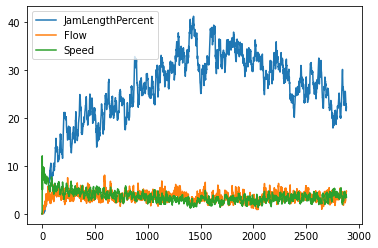

2021-04-22 19:34:53.027212


In [37]:
count = {
'RAMA4_FP1_END_MINGREEN': 0,
'RAMA4_FP1_END_MAXGREEN' : 0,
'RAMA4_FP1_END_FLOW' : 0,
'RAMA4_FP3_END_UNJAM': 0,
'RAMA4_FP3_END_OCC': 0,
'RAMA4_FP3_END_MINGREEN': 0,
'RAMA4_FP3_END_MAXGREEN': 0,
'RAMA4_FPX_TP1_UNJAM': 0,
'RAMA4_FPX_TP5_UNJAM': 0,
'RAMA4_FP2_END_MINGREEN': 0,
'RAMA4_FP2_END_MAXGREEN': 0,
'RAMA4_FP2_END_FLOW': 0,
'RAMA4_FPX_TP1_UNJAM': 0,
'RAMA4_FPX_TP5_UNJAM': 0,
'RAMA4_FP4_END_MAXGREEN': 0,
'RAMA4_FP4_END_MINGREEN' : 0,
'RAMA4_FP4_END_UNJAM': 0,
'RAMA4_FPX_TP1_UNJAM': 0,
'RAMA4_FP5_END_MINGREEN' : 0,
'RAMA4_FP5_END_MAXGREEN': 0,
'RAMA4_FP5_END_OCC': 0,

'KLONGTEI_FP3_END_FLOW': 0,
'KLONGTEI_NO_P3_MAXGREEN': 0,
'KLONGTEI_P3_MAXGREEN': 0,

'NARANONG_FP2_END_OCC' : 0,
'NARANONG_FP2_END_FLOW': 0,
'NARANONG_FP1_END_MINGREEN': 0,
'NARANONG_FPX_TP2_UNJAM': 0,
'NARANONG_FP1_END_MAXGREEN': 0,
'NARANONG_FP1_END_OCC': 0,
'NARANONG_FP2_END_MINGREEN': 0,
'NARANONG_FPX_TP1_UNJAM': 0,
'NARANONG_FP3_END_MINGREEN': 0,
'NARANONG_FP3_END_MAXGREEN':0,
'NARANONG_FPX_TP2_UNJAM': 0,
'NARANONG_FPX_TP1_UNJAM': 0,
'NARANONG_FP3_END_FLOW': 0,
'NARANONG_FP4_END_MAXGREEN': 0,
'NARANONG_FP4_END_MINGREEN': 0,
'NARANONG_FPX_TP1_UNJAM': 0,
'NARANONG_FP4_END_OCC': 0,
'NARANONG_FPX_TP2_UNJAM': 0,
'NARANONG_FPX_TP1_UNJAM': 0,
'NARANONG_FP5_END_OCC': 0,
'NARANONG_FP5_END_MINGREEN':0,
'NARANONG_FP5_END_MAXGREEN': 0,
'NARANONG_FPX_TP2_UNJAM': 0,
'NARANONG_FPX_TP1_UNJAM': 0,
'NARANONG_FP6_END_OCC': 0,
'NARANONG_FP6_END_MAXGREEN': 0,
'NARANONG_FP6_END_MINGREEN' : 0,

'SUNLAKAKHON_FP1_END_MAXGREEN': 0,
'SUNLAKAKHON_FP1_END_FLOW': 0,
'SUNLAKAKHON_FPX_TP1_UNJAM': 0,
'SUNLAKAKHON_FP1_END_MAXGREEN': 0,
'SUNLAKAKHON_FP2_END_FLOW': 0,
'SUNLAKAKHON_FPX_TP1_UNJAM': 0,
'SUNLAKAKHON_FP3_TP4_UNJAM': 0,
'SUNLAKAKHON_FP3_END_FLOW': 0,
'SUNLAKAKHON_FPX_TP1_UNJAM': 0,
'SUNLAKAKHON_FP4_END_MAXGREEN': 0,
'SUNLAKAKHON_FP4_END_FLOW': 0,
'SUNLAKAKHON_FP1_END_MINGREEN':0,
'SUNLAKAKHON_FP2_END_MINGREEN':0,
'SUNLAKAKHON_FP3_END_MINGREEN':0,
'SUNLAKAKHON_FP4_END_MINGREEN':0,

'KASEMRAT_FP3_END_MINGREEN':0,
'KASEMRAT_FP2_END_MINGREEN':0,
'KASEMRAT_FP1_END_MINGREEN':0,
'KASEMRAT_FP2_END_MAXGREEN':0,
'KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT': 0,
"KASEMRAT_FPX_TP2_UNJAM_EB_RAMA4":0,
'KASEMRAT_FPX_TP2_UNJAM_EB': 0,
'KASEMRAT_FP1_END_MAXGREEN': 0,
'KASEMRAT_FPX_TP3_UNJAM': 0,
'KASEMRAT_FP2_TP1_FLOW': 0,
'KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT': 0,
'KASEMRAT_FPX_TP2_UNJAM_EB': 0,
'KASEMRAT_FPX_TP2_UNJAM_ARI': 0,
'KASEMRAT_FP3_END_MAXGREEN': 0}
 
global count

duration={
    'RAMA4_FP1_END_MINGREEN' :30,
    'RAMA4_FP1_END_MAXGREEN' :120,
    'RAMA4_FP3_END_MINGREEN': 5,
    'RAMA4_FP3_END_MAXGREEN': 30,
    'RAMA4_FP2_END_MINGREEN': 30,
    'RAMA4_FP2_END_MAXGREEN' : 60,
    'RAMA4_FP4_END_MINGREEN' : 45,
    'RAMA4_FP4_END_MAXGREEN' : 90,
    'RAMA4_FP5_END_MINGREEN' : 30,
    'RAMA4_FP5_END_MAXGREEN' : 60,

    'KLONGTEI_NO_P3_MAXGREEN': 120,
    'KLONGTEI_P3_MAXGREEN': 30,

    'NARANONG_FP1_END_MAXGREEN': 120,
    'NARANONG_FP1_END_MINGREEN': 10,
    'NARANONG_FP2_END_MAXGREEN': 30,
    'NARANONG_FP2_END_MINGREEN': 15,
    'NARANONG_FP3_END_MAXGREEN': 180,
    'NARANONG_FP3_END_MINGREEN': 45,
    'NARANONG_FP4_END_MAXGREEN': 180, ##
    'NARANONG_FP4_END_MINGREEN':15,
    'NARANONG_FP5_END_MINGREEN':45,
    'NARANONG_FP5_END_MAXGREEN':120,
    'NARANONG_FP6_END_MAXGREEN': 45,
    'NARANONG_FP6_END_MINGREEN': 30,

    'SUNLAKAKHON_FP1_END_MAXGREEN': 180,
    'SUNLAKAKHON_FP2_END_MAXGREEN': 60,
    'SUNLAKAKHON_FP3_END_MAXGREEN': 60,
    'SUNLAKAKHON_FP4_END_MAXGREEN': 60,
    'SUNLAKAKHON_FP1_END_MINGREEN':30,
    'SUNLAKAKHON_FP2_END_MINGREEN':30,
    'SUNLAKAKHON_FP3_END_MINGREEN':30,
    'SUNLAKAKHON_FP4_END_MINGREEN':30,

    'KASEMRAT_FP3_END_MAXGREEN': 30,
    'KASEMRAT_FP3_END_MINGREEN':10,
    'KASEMRAT_FP2_END_MINGREEN':30,
    'KASEMRAT_FP1_END_MINGREEN':5,
    'KASEMRAT_FP1_END_MAXGREEN': 15,
    'KASEMRAT_FP2_END_MAXGREEN': 120
}

threshold = { 
    "RAMA4_FP1_END_FLOW": 0.2, #0.25
    "RAMA4_FP3_END_UNJAM": 5, #
    "RAMA4_FP3_END_OCC": 40, #10
    "RAMA4_FPX_TP1_UNJAM": 270, #
    "RAMA4_FPX_TP5_UNJAM": 10,
    "RAMA4_FP2_END_FLOW": 0.25,
    "RAMA4_FP4_END_UNJAM": 461.1,
    "RAMA4_FP5_END_OCC": 5, #5
    "KLONGTEI_FP3_END_FLOW": 0.2 , #
    "NARANONG_FP1_TP2_UNJAM": 10,
    "NARANONG_FP1_END_OCC": 30,
    "NARANONG_FP2_END_OCC": 5, ##
    'NARANONG_FP2_END_FLOW': 0.25,
    "NARANONG_FP3_END_FLOW": 1,
    "NARANONG_FP4_END_OCC": 5, ##
    "NARANONG_FP5_END_OCC": 5, #2
    "NARANONG_FP6_END_OCC": 5, #10
    "NARANONG_FPX_TP2_UNJAM": 700,
    "NARANONG_FPX_TP1_UNJAM": 85,
    "SUNLAKAKHON_FP1_END_FLOW": 0.25,
    "SUNLAKAKHON_FPX_TP1_UNJAM": 400,
    "SUNLAKAKHON_FP2_END_FLOW": 0.25,
    "SUNLAKAKHON_FP3_TP4_UNJAM": 400,
    "SUNLAKAKHON_FP3_END_FLOW": 0.25,
    "SUNLAKAKHON_FP4_END_FLOW": 0.25,
    "KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT": 10,
    "KASEMRAT_FPX_TP2_UNJAM_EB": 100,
    "KASEMRAT_FPX_TP2_UNJAM_EB_RAMA4": 400,
    "KASEMRAT_FPX_TP2_UNJAM_ARI": 10,
    "KASEMRAT_FPX_TP3_UNJAM": 650,
    "KASEMRAT_FP2_TP1_FLOW": 0.25
}
from datetime import datetime
print(datetime.now())
episode0(threshold, duration) #PEAM
print(datetime.now())

In [38]:
# def get_action():
#     i = random.randint(60)
#     return i

In [39]:
# traci.close()

In [40]:
# class KASEMRAT(gym.Env):
#     def __init__(self):
#         self.action_space = gym.spaces.Discrete(60)
#         self.observation_space = gym.spaces.Discrete(29)
#     def step(self, action):
#         action = get_action()
#         state = np.array(state)+np.array(action)
#         reward = episode0(state, duration)
#         done = True
#         return state, reward, done
#     def reset(self):
#             self.reward = 0
#             self.done = False
#             return state

In [41]:
# np.array([1,2])+np.array([1,2])

In [42]:
count

{'RAMA4_FP1_END_MINGREEN': 833,
 'RAMA4_FP1_END_MAXGREEN': 0,
 'RAMA4_FP1_END_FLOW': 118,
 'RAMA4_FP3_END_UNJAM': 17,
 'RAMA4_FP3_END_OCC': 17,
 'RAMA4_FP3_END_MINGREEN': 50,
 'RAMA4_FP3_END_MAXGREEN': 2,
 'RAMA4_FPX_TP1_UNJAM': 104,
 'RAMA4_FPX_TP5_UNJAM': 6,
 'RAMA4_FP2_END_MINGREEN': 462,
 'RAMA4_FP2_END_MAXGREEN': 4,
 'RAMA4_FP2_END_FLOW': 15,
 'RAMA4_FP4_END_MAXGREEN': 4,
 'RAMA4_FP4_END_MINGREEN': 709,
 'RAMA4_FP4_END_UNJAM': 10,
 'RAMA4_FP5_END_MINGREEN': 203,
 'RAMA4_FP5_END_MAXGREEN': 21,
 'RAMA4_FP5_END_OCC': 10,
 'KLONGTEI_FP3_END_FLOW': 109,
 'KLONGTEI_NO_P3_MAXGREEN': 110,
 'KLONGTEI_P3_MAXGREEN': 1,
 'NARANONG_FP2_END_OCC': 5,
 'NARANONG_FP2_END_FLOW': 13,
 'NARANONG_FP1_END_MINGREEN': 165,
 'NARANONG_FPX_TP2_UNJAM': 3,
 'NARANONG_FP1_END_MAXGREEN': 39,
 'NARANONG_FP1_END_OCC': 20,
 'NARANONG_FP2_END_MINGREEN': 30,
 'NARANONG_FPX_TP1_UNJAM': 42,
 'NARANONG_FP3_END_MINGREEN': 150,
 'NARANONG_FP3_END_MAXGREEN': 0,
 'NARANONG_FP3_END_FLOW': 14,
 'NARANONG_FP4_END_MAXGREEN': 